# Анализ заведений общественного питания в Москве

## Введение

Необходимо провести исследовательский анализ рынка заведений общественного питания Москвы. Эти результаты помогут в выборе подходящего места для открытия зведения.

Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

### Цели и задачи проекта
**Цель:** Провести исследовательский анализ данных заведений общественного питания в Москве. Для принятия решения о месте открытия заведения общественного питания.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провоерить данные на корреткность:
   - ошибки;
   - пропуски;
   - явные и неявные дубликаты.
4. Провести предобработку данных.
   - преобразовать данные к нужному типу;
   - исправить ошибки в данных;
   - обработать пропуски;
   - избавиться от явных и неявных дубликатов.
6. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных в столбце `rating` с другими данными.
7. Сформулировать выводы по проведённому анализу.

### Описание данных

Датасеты, которые понадобятся в проекте:

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` — информация о среднем чеке в заведениях общественного питания.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## Загрузка данных и знакомство с ними

1. Загрузим данные из таблиц  заведениях общественного питания Москвы `rest_info.csv`, `rest_price.csv` и импортируем необходимые библиотеки.
2. Познакомимся с данными и изучите общую информацию о них.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
# Установка библиотеки phik
!pip install phik

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [5]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://...')
price_df = pd.read_csv('https://...')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [6]:
# Выводим первые строки датафрейма info_df на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [7]:
# Выводим информацию о датафрейме info_df
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [8]:
# Выводим первые строки датафрейма price_df на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [9]:
# Выводим информацию о датафрейме price_df
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


#### Промежуточный вывод

**Таблица `rest_info.csv`**

Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация об использовании клиентами услуг банка.

После первичного анализа данных можно сделать следующие выводы:

- Значения в столбцах `id`, `name`, `category`, `address`, `district`, `hours` хранятся в типе данных `object`. 
- Значения в столбцах  `rating`, `seats` представлены числами с плавающей точкой. 
- Значения в стоблце `chain` хранятся в типе данных `int64`, данный тип можно оптимизировать с понижением размерности. Значение в столбце показывает является ли заведение сетевым (1) или нет (0).
- Пропуски содержатся только в столбце `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

**Таблица `rest_price.csv`**

Датасет содержит 5 столбцов и 4058 строк, в которых представлена информация о клиентах банка. По аналогии с предыдущим датасетом можно отметить, что:

- Названия столбцов лучше привести к единому виду, например snake_case.
- Пропуски встречаются во всех стобцах датасета, кроме столбца `id`. 
- Типы данных соответствуют содержимому.
- Значения в столбцах соответствуют описанию.


---


### Подготовка единого датафрейма

Объединим данные двух датасетов в один, с которым и продолжим работу.

In [10]:
# Объединяем данные в датафрейм df по полю id
df = info_df.merge(price_df, on='id', how='left')

In [11]:
# Выводим информацию о датафрейме df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные объединены, информация обо всех пользователях сохранилась.

---


## Предобработка данных

Подготовим данные к исследовательскому анализу: изучим корректность типов данных и при необходимости проведем их преобразование.

In [12]:
# Оптимизируем целочисленный тип данных
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [13]:
# Проверим типы данных в датафрейме info_df с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Тип данных в колонке `chain` был успешно оптимизирован с понижением размерности целочисленных данных.

---


### Пропуски

Изучим пропущенные значения в данных: 
1. Посчитаем их количество в каждом столбце датафрейме.
2. Изучим данные с пропущенными значениями и предположим гипотезы их появления.
3. проведем обработку пропущенных значений: 
    - замена пропусков на определённое значение; 
    - удаление строки с пропусками;
    - оставить их как есть.

In [14]:
# Применим метод isna() к датафрейму df, посчитаем количество пропусков для каждой колонки
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [15]:
# Подсчитаем долю пропусков в каждой колонке
df.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В датафрейме обнаружены пропуски в следующих столбцах:

- `hours` - 536 пропусков (6%). Незначительное количество пропусков, строки пропусками в данной колонке можно удалить.
- `seats` - 3611 пропусков (43%). Так как в колонке более 40% значений пропущено лучше заменить их значениями индикаторами.

Пропуски в полях указанных выше можно объяснить человеческим фактором т.е. пользователь не заполнил эту информацию. В случае с полем seats возможен вариант, когда в заведении отсутствовали посадочные места и это поле не заполнялось. Например, такое может быть в кофейнях, булочных, кафе, в которых покупает еда на вынос.

Основная причина возникновения большого количества пропусков в колонках указанных ниже - это объединения датасетов. Из-за использования левого типа присоединения в новом датасете появились строки с заведениями, по которым нет информации о категории цен, средней стоимости и т.д.
- `price` - 5091 пропусков (61%). Более половины значений пропущено.
- `avg_bill` - 4590 пропусков (55%). Более половины значений пропущено.
- `middle_avg_bill` - 5257 пропусков (63%). Заменим значения индикаторами.
- `middle_coffee_cup` - 7871 пропусков (93%). В большинстве строк в колонке `middle_coffee_cup` информация отсутствует. В зависимости от дальнейшего анализа удалим колонку, либо заменим пропуски на индикаторы.

Изначально эти пропуски могли возникнуть из-за человеческого фактора т.е. пользователь по какой-то причине не стал заполнять эту информацию о своей компании.
Значения в поле `middle_coffee_cup` может отсутствовать, если в заведении не подаётся такой напиток как кофе (например суши бар).

Так как в полях `middle_avg_bill`, `middle_coffee_cup` больше половины значений пропущено, считаю не целесообразным заполнять эти пропуски средним значением. В данной ситуации логичнее заполнить пропуски значениями индикаторами.


**Поитогу анализа, приняли решения не заполнять пропуски на текущем этапе.**

---


### Явные и неявные дубликаты
Проверим данные на явные и неявные дубликаты. Для оптимизации проверки нормализуем данные в текстовых столбцах.

In [16]:
# Изучим уникальные значения в столбцах
for column in ['category', 'district', 'rating', 'chain', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце rating:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. ]

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]



Перед проверкой на уникальность нормализуем данные в текстовых столбцах.

In [17]:
# Приводим все значения в столбцах типа object к нижнему регистру и удалим пробелы в начале и конце строк
df['name'] = df['name'].str.lower()
df['name'] = df['name'].str.strip()
df['address'] = df['address'].str.lower()
df['address'] = df['address'].str.strip()

Проверим датафрейме на неявные дубликаты по нескольким полям.

In [18]:
# Проверяем полные дубликаты в датафрейме
df.duplicated(subset=['name', 'address']).sum()

4

Нашли 4 дубликата. Удалим найденные дубликаты.

In [19]:
# Сохраняем количество строк до удаления дубликатов
initial_row_count = df.shape[0]

# Сортируем датафрейм по всем столбцам
df_sorted = df.sort_values(by=list(df.columns))

# Удаляем дубликаты
df_cleaned = df_sorted.drop_duplicates(subset=['name', 'address'], keep='first')

# Сохраняем количество строк после удаления дубликатов
final_row_count = df_cleaned.shape[0]

# Выводим результаты
print(f"Количество строк до удаления дубликатов: {initial_row_count}")
print(f"Количество строк после удаления дубликатов: {final_row_count}")

Количество строк до удаления дубликатов: 8406
Количество строк после удаления дубликатов: 8402


Проверим на неявные дубликаты значения в поле `id`. Данные значения должны быть уникальными, то есть каждая строка в данных — уникальный клиент.

In [20]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='id').sum()

0

Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [21]:
# Временно заполним пропуски в столбце `hours` индикатором
df['hours'] = df['hours'].fillna('')

In [22]:
# Создадим и заполним столбец is_24_7 
df['is_24_7'] = df['hours'].apply(lambda x: 'ежедневно' in x and 'круглосуточно' in x)

### Промежуточный вывод

Предоставленные данные хорошего качества и требуют не так много действий по предобработке. В результате предобработки данных были выполнены следующие действия:

- В датафрейме найдено 4 дубликата, дубликаты удалены. 
- Скорректированы названия столбцов — их привели к стилю snake case;
- Изучены пропуски в данных. Пропуски обнаружились в столбцах: `hours` (6%), `seats` (42%), `price` (61%) `avg_bill` (55%),  `middle_avg_bill` (63%), `middle_coffee_cup`(93%). В столбце `hours` строки с пропусками были удалены. В остальных случаях пропуски были заменены на значения индикаторы.
- Данные проверили на явные и неявные дубликаты — в данных их нет.

---


## Исследовательский анализ данных

Проведем исследовательский анализ исходных данных.

### Категории заведений

Определим какие категории заведений представлены в данных. Исследуем количество объектов общественного питания по каждой категории.

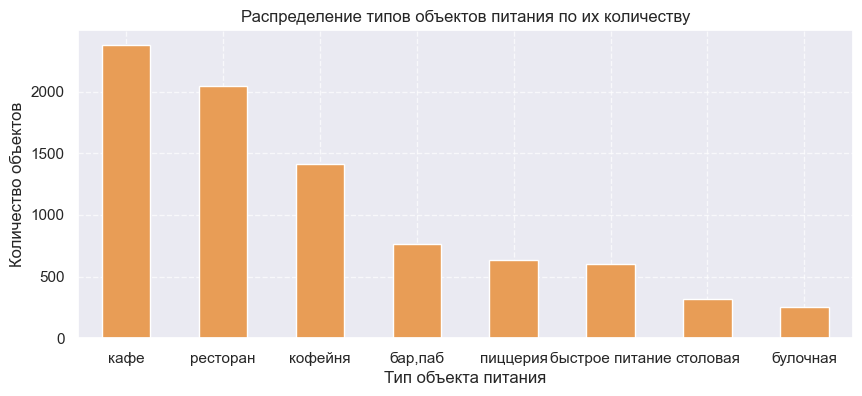

In [87]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(kind='bar', 
                                   rot=0, 
                                   figsize=(10, 4),
                                   color='#E89D56'                               
)

#Настроим фон
sns.set_theme(style='darkgrid')

# Настраиваем оформление графика
plt.title(f'Распределение типов объектов питания по их количеству')
plt.xlabel('Тип объекта питания')
plt.ylabel('Количество объектов')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [24]:
# Выведем числовое значение количества заведений общественного питания
print(f'Распределение типов объектов питания по их количеству:')
print(round(df['category'].value_counts().sort_values(ascending=False)))

Распределение типов объектов питания по их количеству:
category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64


In [25]:
# Посчитаем долю заведний от их обего количества
print(f'Процент заведений:')
round(df['category'].value_counts() / df['category'].value_counts().sum() * 100)

Процент заведений:


category
кафе               28.0
ресторан           24.0
кофейня            17.0
бар,паб             9.0
пиццерия            8.0
быстрое питание     7.0
столовая            4.0
булочная            3.0
Name: count, dtype: float64

#### Промежуточный вывод

В Москве наиболее распростронены кафе - 2378 заведений (28%), наименее распространены булочные - 256 заведений (3%).

---

### Распределение заведений по райном Москвы

1. Определим какие административные районы Москвы присутствуют в данных.
2. Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. 

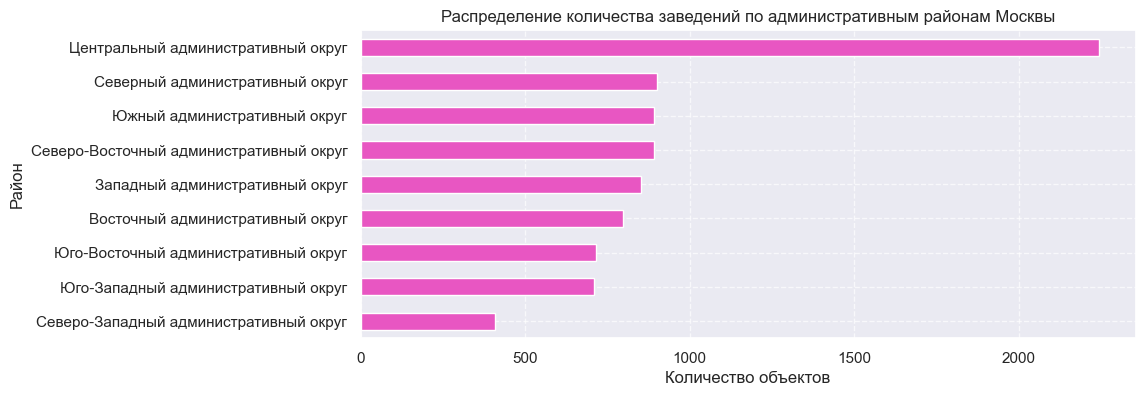

In [26]:
grouped_by_district = df['district'].value_counts().sort_values(ascending=True)

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
grouped_by_district.plot(kind='barh', 
                         rot=0, 
                         figsize=(10, 4),
                         color='#E856C2'               
)

#Настроим фон
sns.set_theme()

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Распределение количества заведений по административным районам Москвы')
plt.xlabel('Количество объектов')
plt.ylabel('Район')

# Выводим график
plt.show()

In [27]:
print(f'Количесво заведений по округам:')
df['district'].value_counts()

Количесво заведений по округам:


district
Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64


---

Создадим отдельную выборку с данными только по Центральному административному округу Москвы.

In [28]:
df_moscow = df.loc[(df['district'] == 'Центральный административный округ')]

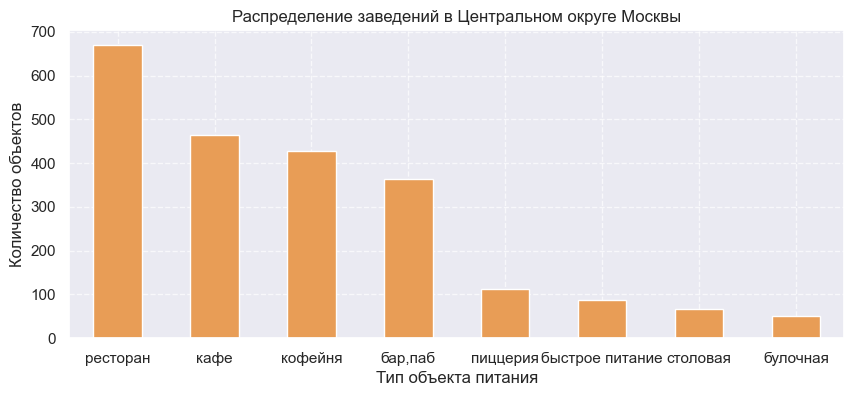

In [29]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_moscow['category'].value_counts().plot(kind='bar', 
                                   rot=0, 
                                   figsize=(10, 4),
                                   color='#E89D56'                                
)

#Настроим фон
sns.set_theme()

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Распределение заведений в Центральном округе Москвы')
plt.xlabel('Тип объекта питания')
plt.ylabel('Количество объектов')
sns.set_theme()

# Выводим график
plt.show()

In [30]:
print(f'Количесво заведений по категориям в Центральном административном округе:')
df_moscow['category'].value_counts()

Количесво заведений по категориям в Центральном административном округе:


category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

In [31]:
# Посчитаем долю заведний от их обего количества
print(f'Процент заведений:')
round(df_moscow['category'].value_counts() / df_moscow['category'].value_counts().sum() * 100)

Процент заведений:


category
ресторан           30.0
кафе               21.0
кофейня            19.0
бар,паб            16.0
пиццерия            5.0
быстрое питание     4.0
столовая            3.0
булочная            2.0
Name: count, dtype: float64

#### Промежуточный вывод

В данных присутствуют следующие административные районы Москвы:
- Восточный административный округ;
- Западный административный округ;
- Северный административный округ;
- Северо-Восточный административный округ;
- Северо-Западный административный округ;
- Центральный административный округ;
- Юго-Восточный административный округ;
- Юго-Западный административный округ;
- Южный административный округ.

Наибольшее количество заведений находистя в Центральном административном округе (2242), наименьшее в Северо-Западном административном округе (409).

В Москве в топ-3 воходят зваедения типа:
1. кафе - 2378 заведений (28%).
2. ресторан - 2043 заведений (24%).
3. кофейня - 1413 заведений (17%).

В Центральном округе в топ-3 входят:
1. ресторан - 670 заведений (30%).
2. кафе - 464 заведений (21%).
3. кофейня - 428 заведений (19%).

Можно предположить, что ресторан лучше открывать в Центральном округе т.к. скорее всего там он будет пользуется наибольшей популярностью по сравненю с другими округами города Москвы.


---

### Сетевые и несетевые заведения

1. Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. 
2. Определим:
    - каких заведений больше — сетевых или несетевых;
    - какие категории заведений чаще являются сетевыми.

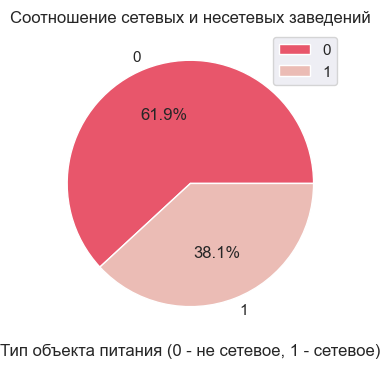

In [32]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

colors = ['#E8566B', '#EBBCB5']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['chain'].value_counts().plot(kind='pie',
                                autopct='%1.1f%%', 
                                legend=True,
                                colors=colors

)

# Настраиваем оформление графика
plt.title(f'Соотношение сетевых и несетевых заведений')
plt.xlabel('Тип объекта питания (0 - не сетевое, 1 - сетевое)')
plt.ylabel('')

# Выводим график
plt.show()

In [33]:
print(f'Количесво сетевых и несетевых заведений (0 - не сетевое, 1 сетевое):')
df['chain'].value_counts()

Количесво сетевых и несетевых заведений (0 - не сетевое, 1 сетевое):


chain
0    5201
1    3205
Name: count, dtype: int64

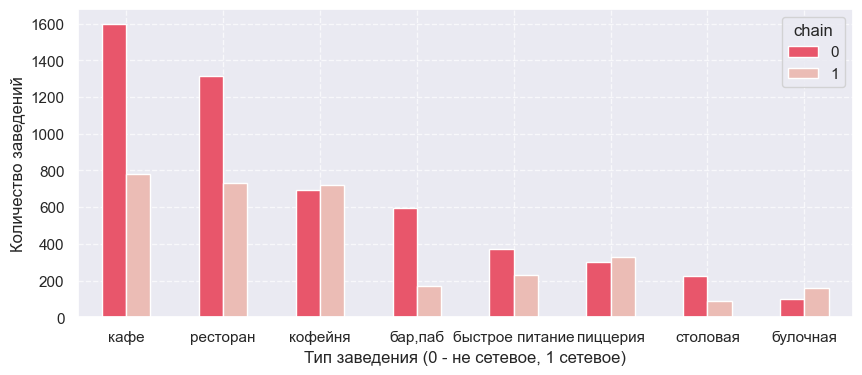

In [34]:
# Построим график столбчатой диаграммы
grouped_by_cat_ch = df.groupby('category')['chain'].value_counts().unstack(fill_value=0).sort_values(by=0, ascending=False)

colors = ['#E8566B', '#EBBCB5']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
grouped_by_cat_ch.plot(kind='bar', 
                       rot=0, 
                       figsize=(10, 4),
                       color=colors                             
)

#Настроим фон
sns.set_theme()

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.xlabel('Тип заведения (0 - не сетевое, 1 сетевое)')
plt.ylabel('Количество заведений')
sns.set_theme()

# Выводим график
plt.show()

In [35]:
grouped_by_cat = df.groupby(['category', 
                             'chain']).agg(cnt_catering=('id', 
                                                         'count')).unstack(fill_value=0)
#unstack(fill_value=0)
grouped_by_cat = grouped_by_cat.reset_index()
grouped_by_cat

category cnt_catering     
chain                             0    1
0              бар,паб          596  169
1             булочная           99  157
2      быстрое питание          371  232
3                 кафе         1599  779
4              кофейня          693  720
5             пиццерия          303  330
6             ресторан         1313  730
7             столовая          227   88

In [36]:
grouped_by_cat = df['category'].value_counts()
print(f'Общее количество заведений по категориям:')
grouped_by_cat

Общее количество заведений по категориям:


category
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

In [37]:
# Делаем срез данных, где только сетевые заведения
df_slice_cat = df.loc[(df['chain'] == 1)]

In [38]:
# Считаем кол-во сетевых заведений по категориям
grouped_by_cat_sl = df_slice_cat['category'].value_counts()
print(f'Количество сетевых заведений по категориям:')
grouped_by_cat_sl

Количество сетевых заведений по категориям:


category
кафе               779
ресторан           730
кофейня            720
пиццерия           330
быстрое питание    232
бар,паб            169
булочная           157
столовая            88
Name: count, dtype: int64

In [39]:
# Рассчитываем долю сетевых завдений
share = round(grouped_by_cat_sl / grouped_by_cat, 2)
print(f'Доля сетевых заведений:')
print(share.sort_values(ascending=False))

Доля сетевых заведений:
category
булочная           0.61
пиццерия           0.52
кофейня            0.51
быстрое питание    0.38
ресторан           0.36
кафе               0.33
столовая           0.28
бар,паб            0.22
Name: count, dtype: float64


In [40]:
grouped_sum = df['category'].value_counts().sum()
print(f'Общее количество заведений: {grouped_sum}')

Общее количество заведений: 8406


In [41]:
# Рассчитываем долю сетевых завдений
share_sum = round(grouped_by_cat_sl / grouped_sum, 3)
print(f'Доля сетевых заведений от общего кол-ва по категориям:')
print(share_sum.sort_values(ascending=False))

Доля сетевых заведений от общего кол-ва по категориям:
category
кафе               0.093
ресторан           0.087
кофейня            0.086
пиццерия           0.039
быстрое питание    0.028
бар,паб            0.020
булочная           0.019
столовая           0.010
Name: count, dtype: float64


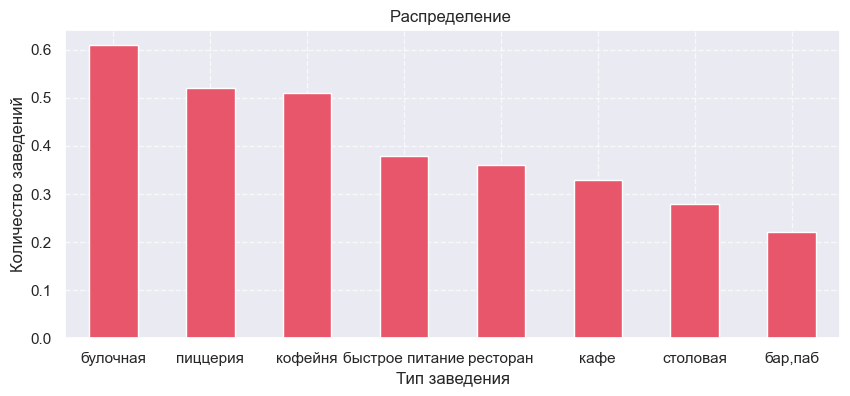

In [42]:
share = share.sort_values(ascending=False)

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
share.plot(kind='bar', 
           rot=0, 
           figsize=(10, 4),
           color='#E8566B'                               
)

#Настроим фон
sns.set_theme()

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Распределение ')
plt.xlabel('Тип заведения')
plt.ylabel('Количество заведений')

# Выводим график
plt.show()

#### Промежуточный вывод

В Москве присутствует больше не сетевых заведений (5201), что составляет более 60% от общего количества заведений. Сетевых 3205, менее 30%.

- Для сетевых заведений и несетевых заведений наиболее популярна категория: кафе (1599 и 779).
- Для несетевых заведений наименее популярна категория: булочная (99). Для сетевых: столовая (88).
- На втором и третьем местах ресторан (1313 и 730), кофейня (693 и 720).

Топ-3 категорий заведений с наибольшей долей сетевых:
- булочная - 0.61;
- пиццерия - 0.52;
- кофейня - 0.51.

Для категорий заведений из топ-3 количество сетевых заведений составляет более 50%,

Стоит отметить, что:
- Случае с сетевыми заведениями кафе, ресторанов и кофеен разница в их количестве не значительная и находится в диапазоне от 720 до 779. Для несетевых - диапазон составляет значения от 693 до 1599 т.е. количество не сетевых кафе больше количества несетевых кофеен более чем в два раза.
- Количество сетевых кофеен в абсолютных значениях больше чем не сетевых. Следовательно, кофейни чаще всего открывают по франшизе, можно предположить что это более выгодно.

---

### Количество мест в заведениях

1. Рассчитаем количество посадочных мест в заведениях. 
2. Определим встречаются ли в данных аномальные значения или выбросы. Сделаем предположение, то с чем они могут быть связаны. 
3. Найдем для каждой категории заведений наиболее типичное для него количество посадочных мест. 

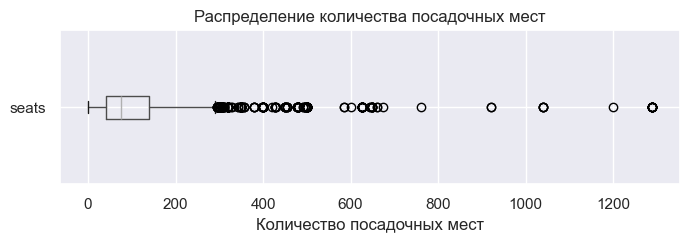

In [43]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 2))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

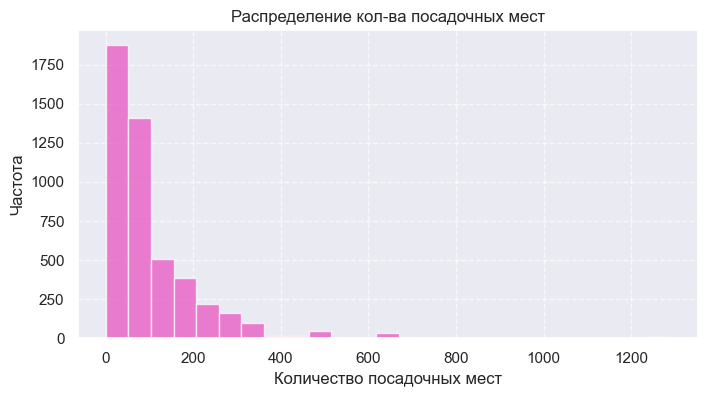

In [44]:
# Строим гистограмму с помощью pandas через plot(kind='hist')
df['seats'].plot(kind='hist', # Тип графика - гистограмма
                 bins=25, # Устанавливаем количество корзин - всего 25
                 figsize=(8, 4),
                 alpha=0.75,
                 color='#E856C2'
)

#Настроим фон
sns.set_theme()

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title('Распределение кол-ва посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

# Выводим график
plt.show()

In [45]:
# Изучим статистические показатели столбца seats
print('Статистические показатели')
df['seats'].describe()

Статистические показатели


count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

На диаграмме размаха наблюдается большое количество выбросов. Также в данных присутсвует существанная разница между значением среднего и медианы, высокое значение стандартного отклонения.

Так как значения с количеством мест меньше 0 и более 200 являются аномальными для стандартного заведения обществанного питая ограничим выборку.

In [46]:
df_slice = df.loc[(df['seats'] >= 0) & (df['seats'] <= 200)]
print(df_slice['seats'].describe())

count    4168.000000
mean       72.762236
std        50.842556
min         0.000000
25%        36.000000
50%        60.000000
75%       100.000000
max       200.000000
Name: seats, dtype: float64


In [47]:
# Находим 99-й процентиль
outliers = df_slice['seats'].quantile(0.99)

# Отбираем данные, оставляя значения меньше найденного порога выбросов
new_df = df_slice.loc[df_slice['seats'] < outliers]

# Выводим результат describe() после фильтрации данных
print(new_df['seats'].describe())

count    4063.000000
mean       69.474034
std        47.143226
min         0.000000
25%        36.000000
50%        60.000000
75%        98.000000
max       198.000000
Name: seats, dtype: float64


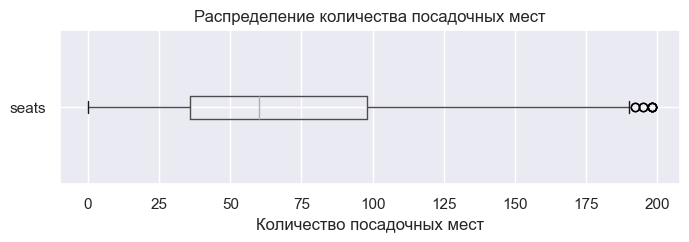

In [48]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 2))

# Строим диаграмму размаха значений в столбце balance
new_df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

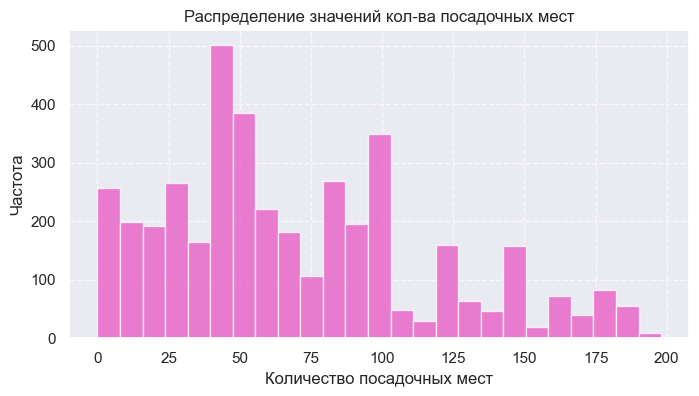

In [49]:
# Строим гистограмму 
new_df['seats'].plot(kind='hist', 
                     bins=25, 
                     figsize=(8, 4),
                     alpha=0.75,
                     color='#E856C2'
)

#Настроим фон
sns.set_theme()

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title('Распределение значений кол-ва посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

# Выводим график
plt.show()

В результате получили гистограмму с неравномерным распределением значений и со значительным сещением в право. 
Изучим распределение количества мест в зависимости от заведения.

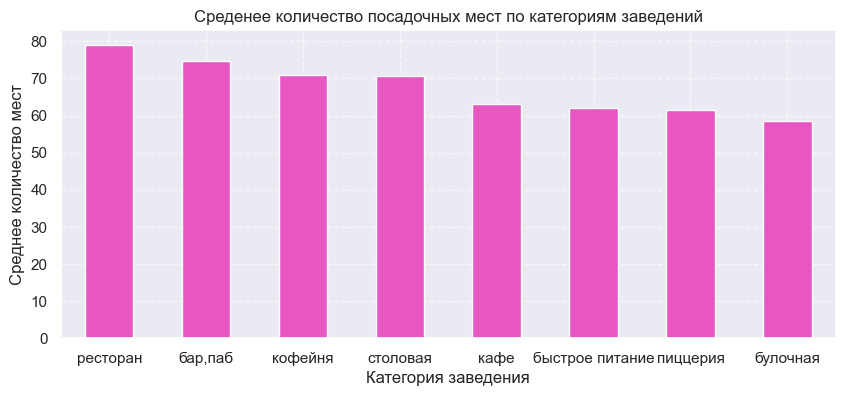

In [50]:
# Сгруппируем данные по категориям и посчитаем количество посадочных мест
grouped = new_df.groupby('category')['seats'].mean().sort_values(ascending=False)

# Строим столбчатую диаграмму
grouped.plot(kind='bar', 
             rot=0, 
             figsize=(10, 4),
             color='#E856C2'                            
)

#Настроим фон
sns.set_theme()

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем оформление графика
plt.title(f'Среденее количество посадочных мест по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Среднее количество мест')
sns.set_theme()

# Выводим график
plt.show()

In [51]:
# Посчитаем средене количество мест для каждого заведения
round(new_df.groupby('category')['seats'].mean().sort_values(ascending=False))

category
ресторан           79.0
бар,паб            75.0
кофейня            71.0
столовая           71.0
кафе               63.0
быстрое питание    62.0
пиццерия           62.0
булочная           59.0
Name: seats, dtype: float64

#### Промежуточный вывод

В данных присутвуют выбросы. Это может быть связано с несколькими факторами:
- Ошибка при вводе данных вместо 100 ввели 1000 и т.д.
- Такие заведения действительно присутвуют и используются для проведения спецефических мероприятий или обслуживаяния спецефических заказчиков. 

Среденее кол-во мест по заведениям:
- ресторан - 79 мест
- бар,паб - 75 мест
- кофейня - 71 место
- столовая - 71 место
- кафе - 63 места
- быстрое питание - 62 места
- пиццерия - 62 места
- булочная - 59 мест

Наибольшее среднее количество посадочных мест **в ресторанах (79)**, наименьшее **в булочных (59)**. Разница между максимумо и минимумо 20. Существенных различий по категориям заведений **не наблюдается**. 

---


### Рейтинг заведений

Исследуем рейтинг заведений:
1. Визуализируем распределение средних рейтингов по категориям заведений. 
2. Определим сильно ли различаются усреднённые рейтинги для разных типов общепита.

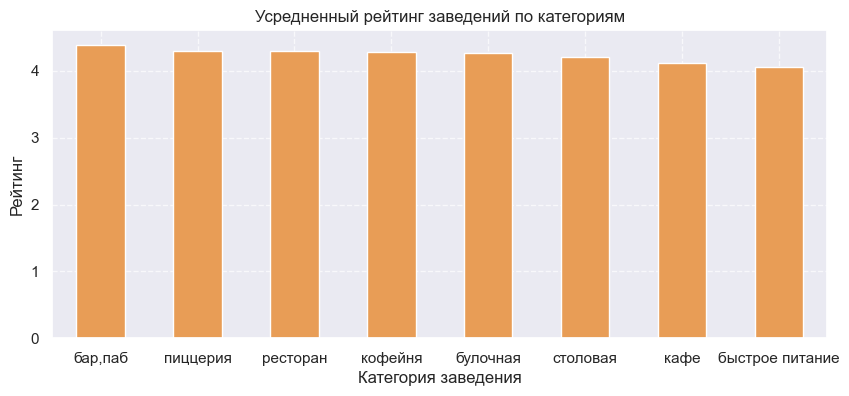

In [52]:
# Построим график столбчатой диаграммы
rating_mean = df.groupby('category')['rating'].mean().sort_values(ascending=False)

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
rating_mean.plot(kind='bar', 
             rot=0, 
             figsize=(10, 4),
             color='#E89D56'
                                
)

# Настраиваем оформление графика
plt.title(f'Усредненный рейтинг заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Рейтинг')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [53]:
# Выведем средней размер рейтинга по категориям
round(rating_mean, 2)

category
бар,паб            4.39
пиццерия           4.30
ресторан           4.29
кофейня            4.28
булочная           4.27
столовая           4.21
кафе               4.12
быстрое питание    4.05
Name: rating, dtype: float64

#### Промежуточный вывод

Все средние оценки находяся в диапазоне от 4.05 до 4.39. Наиболее высокий рейтинг у заведений категории **"бар,паб" = 4.39**, самый низкий у категории **"быстрое питание" = 4.05**. Усреднённые рейтинги для разных категорий заведений **различается несущественно.** 

---

### Корреляция данных

1. Определим, с какими данными показывают самую сильную корреляцию рейтинги заведений.
2. Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. 
3. Определим по матрице самую сильную связь и проверим её.

In [54]:
# Создадим отдельный датафрейм и столбец price_num для изучения корреляций
df_cor = df
df_cor['price_num'] = df['price'].apply(lambda x: 4 if x == 'высокие' 
                                               else (3 if x == 'выше среднего' 
                                               else (2 if x == 'средние' 
                                               else (1 if x == 'низкие' 
                                               else 0))))

In [55]:
df_cor['category_num'] = df_cor['category'].apply(lambda x: 7 if x == 'бар,паб'
                                               else (6 if x == 'булочная'
                                               else (5 if x == 'быстрое питание' 
                                               else (4 if x == 'кафе'
                                               else (3 if x == 'кофейня' 
                                               else (2 if x == 'пиццерия' 
                                               else (1 if x == 'ресторан' 
                                               else 0)))))))

In [56]:
df_cor['district_num'] = df_cor['district'].apply(lambda x: 8 if x == 'Восточный административный округ'
                                               else (6 if x == 'Западный административный округ'
                                               else (6 if x == 'Северный административный округ'
                                               else (5 if x == 'Северо-Восточный административный округ' 
                                               else (4 if x == 'Северо-Западный административный округ'
                                               else (3 if x == 'Центральный административный округ' 
                                               else (2 if x == 'Юго-Восточный административный округ' 
                                               else (1 if x == 'Юго-Западный административный округ' 
                                               else 0))))))))

Построим тепловую карту для всех числовых полей, чтобы изучить корреляцию между ними.

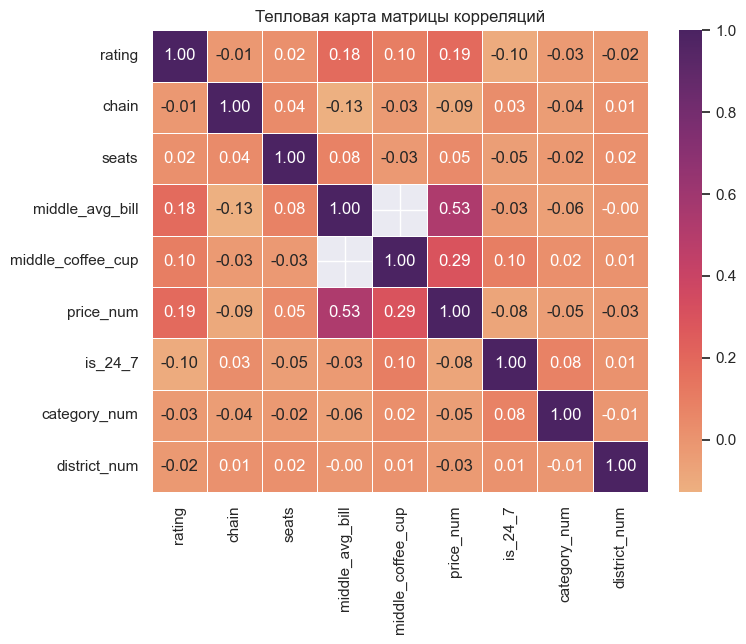

In [57]:
# Считаем матрицу корреляций для всех числовых полей
corr_matrix = df_cor[['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup', 
                      'price_num', 'is_24_7', 'category_num', 'district_num']].corr()

# Задаём размер графика
plt.figure(figsize=(8, 6))

# Создаём визуализацию
sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='flare')

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций')
plt.show()

interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup', 'price_num', 'category_num', 'district_num']


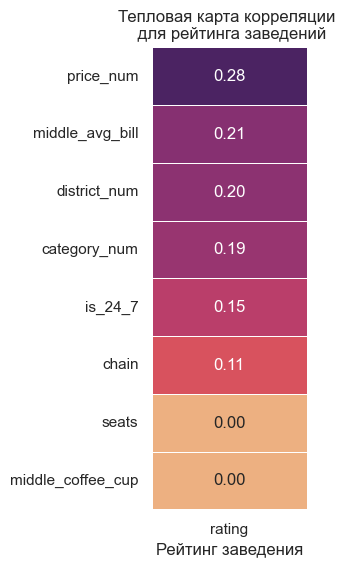

In [58]:
# Вычисляем корреляционную матрицу с использованием phi_k
cor_matrix_rating = df_cor[['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup', 
                                    'price_num', 'is_24_7', 'category_num', 'district_num']].phik_matrix()

data_heatmap_rating = cor_matrix_rating.loc[cor_matrix_rating.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

# Строим тепловую карту
plt.figure(figsize=(2, 6))

sns.heatmap(data_heatmap_rating,
            annot=True,
            fmt='.2f', 
            cmap='flare', 
            linewidths=0.5,
            cbar=False, 
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта корреляции \n для рейтинга заведений')
plt.xlabel('Рейтинг заведения')

# Выводим график
plt.show()

Прежде чем перейти к расчёту корреляции, важно вспомнить, как интерпретировать её значения:
- От 0 до 0.3 — слабая корреляция, то есть взаимосвязи практически нет.
- От 0.3 до 0.7 — умеренная корреляция: существует взаимосвязь, но она не очень сильная.
- От 0.7 до 1.0 — сильная корреляция: взаимосвязь между переменными выражена достаточно ярко.
- 0 — корреляции между переменными нет.
Таким образом, чем ближе значение к 1 (или -1 в случае отрицательной корреляции), тем сильнее линейная связь.

interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup', 'price_num', 'category_num', 'district_num']


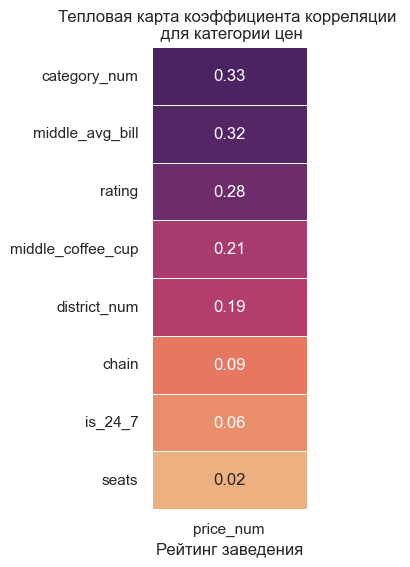

In [59]:
# Вычисляем корреляционную матрицу с использованием phi_k
cor_matrix_price = df_cor[['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup', 
                                    'price_num', 'is_24_7', 'category_num', 'district_num']].phik_matrix()

data_heatmap_price = cor_matrix_price.loc[cor_matrix_price.index != 'price_num'][['price_num']].sort_values(by='price_num', ascending=False)

# Строим тепловую карту
plt.figure(figsize=(2, 6))

sns.heatmap(data_heatmap_price,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='flare', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента корреляции \n для категории цен')
plt.xlabel('Рейтинг заведения')

# Выводим график
plt.show()

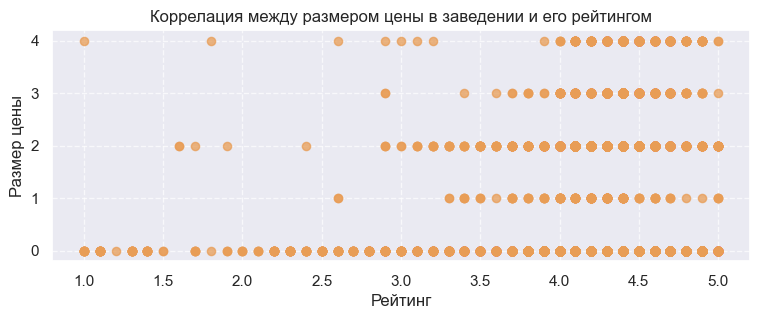

In [60]:
df.plot(kind='scatter',
        figsize=(9,3),
        alpha=0.75,           
        color='#E89D56',        
        s=35, 
        x='rating', 
        y='price_num',               
)

# Настраиваем оформление графика
plt.title(f'Коррелация между размером цены в заведении и его рейтингом')
plt.ylabel('Размер цены')
plt.xlabel('Рейтинг') 

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

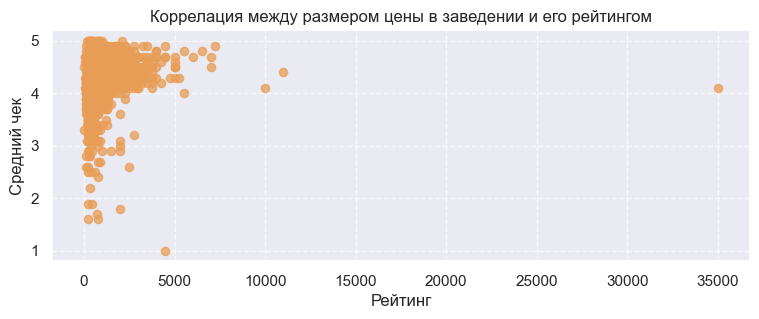

In [61]:
df.plot(kind='scatter',
        figsize=(9,3),
        alpha=0.75,           
        color='#E89D56',        
        s=35, 
        y='rating',  
        x='middle_avg_bill',  
)

# Настраиваем оформление графика
plt.title(f'Коррелация между размером цены в заведении и его рейтингом')
plt.ylabel('Средний чек')
plt.xlabel('Рейтинг') 

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

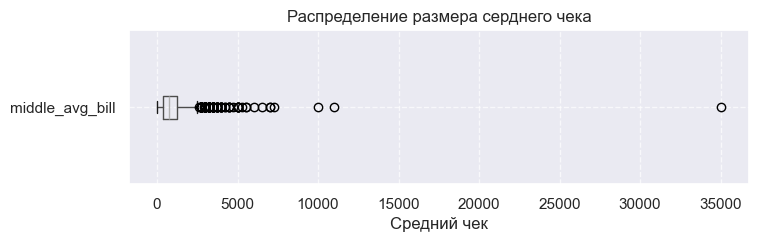

In [62]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 2))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение размера серднего чека')
plt.xlabel('Средний чек')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [63]:
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Так как в данных присутствует значительное количество выбросов, ограничем выбрку 99 процентилем.

In [64]:
# Находим 99-й процентиль
outliers = df_slice['middle_avg_bill'].quantile(0.99)

# Отбираем данные, оставляя значения меньше найденного порога выбросов
df_slice_avg_bill = df.loc[(df['middle_avg_bill'] < outliers) 
                         & (df['middle_avg_bill'] > 0)]

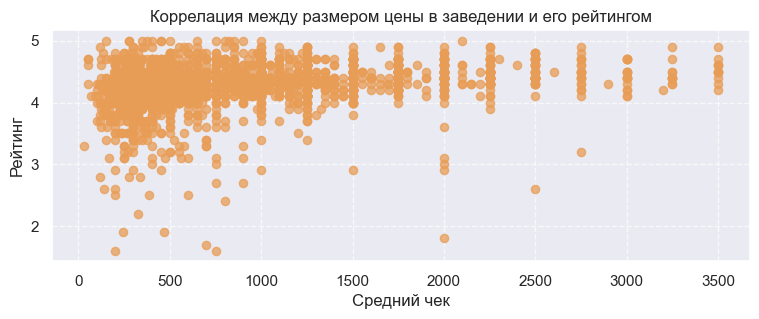

In [65]:
df_slice_avg_bill.plot(kind='scatter',
        figsize=(9,3),
        alpha=0.75,           
        color='#E89D56',        
        s=35, 
        y='rating',  
        x='middle_avg_bill',  
)

# Настраиваем оформление графика
plt.title(f'Коррелация между размером цены в заведении и его рейтингом')
plt.xlabel('Средний чек')
plt.ylabel('Рейтинг') 

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

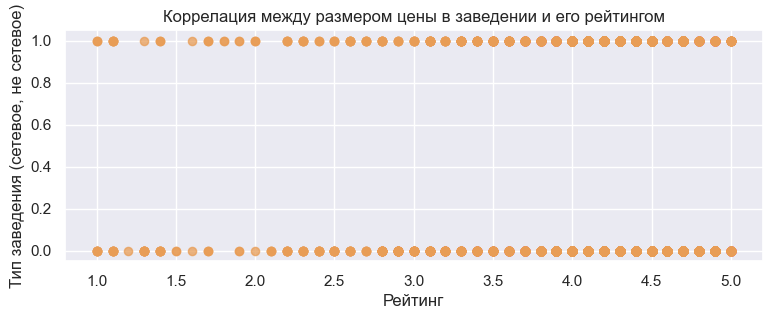

In [66]:
df.plot(kind='scatter',
        figsize=(9,3),
        alpha=0.75,           
        color='#E89D56',        
        s=35,
        x='rating',  
        y='chain'
) 

plt.title(f'Коррелация между размером цены в заведении и его рейтингом')
plt.ylabel('Тип заведения (сетевое, не сетевое)')
plt.xlabel('Рейтинг') 

plt.show()

#### Промежуточный вывод

Существенной корреляции между полями не наблюдается. Наибальшая корреляция встречается между рейтингом и категорией цен (0.28). Также существует высокая корреляция между категорией цен и среденй ценой, но т.к. категория цен формируется на основе среднего эту информацию мы брать в расчет не будем.

По итогам анализа коррелаций можно проследить зависимость: чем выше ценовая категория тем выше рейтинг у заведения, тем реже встречаются отзывы с низкой оценкой и наоборот.


Если коэффиценты тепловой карты находятся в промежутке между 0 до 0.3, корреляция считается слабой. Можно предположить, что  сильной взаимосвязи между колями представленными в датафрейме нет.

### Топ-15 популярных сетей в Москве

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве (количество заведений этой сети в регионе). 
- рассчитаем для них значение среднего рейтинга. 
- определим к какой категории заведений они относятся. 

In [67]:
# Отсечем несетевые заведения
df_is_chain = df.loc[(df['chain'] == 1)]

In [68]:
# Сгруппируем данные по названию заведения
grouped_by_name = df_is_chain.groupby('name').agg(cnt_rest = ('id','count')).sort_values(by='cnt_rest', ascending=False)

# Сбросим индексы
grouped_by_name = grouped_by_name.reset_index()

# Создадим топ 15 заведени
top_15 = grouped_by_name[grouped_by_name.index < 15]

top_15

,name,cnt_rest
0,шоколадница,120
1,домино'с пицца,76
2,додо пицца,74
3,one price coffee,71
4,яндекс лавка,69
5,cofix,65
6,prime,50
7,хинкальная,44
8,кофепорт,42
9,кулинарная лавка братьев караваевых,39


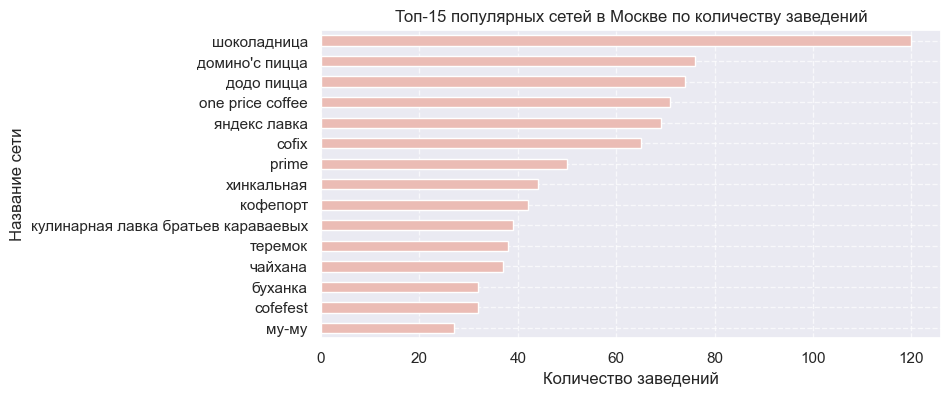

In [69]:
# Построим график столбчатой диаграммы
top_15_sorted = top_15.sort_values(by='cnt_rest', ascending=True)

top_15_sorted.plot(kind='barh',
                          x='name',
                          rot=0,
                          legend=False,
                          figsize=(8, 4),
                          color='#EBBCB5')

# Настраиваем оформление графика
plt.title(f'Топ-15 популярных сетей в Москве по количеству заведений')
plt.xlabel('Количество заведений') 
plt.ylabel('Название сети')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

Топ три сетей по кол-ву заведений: 
- 'Шоколадница' (120 заведений);
- "Домино'с пицца" (76 заведений);
- 'Додо пицца' (74 заведений).

Наименьшее количество заведений сети 'му-му' - 27.                


---

Чтобы изучить рейтинг заведений из Топ-15, необходимо преобразовать данные:
- создадать список с названиями сетевых заведений из Топ-15;
- отфильтровать датафрейм, оставив в нем только информацию о заведениях из Топ-15.

In [70]:
# Создадим список сназваниями сетевых заведений из топ 15
top_15_list = top_15['name']
my_list = list(top_15_list)

# Отфильтруем датафрейм, оставим в нем только информацию о заведениях из топ-15
df_filtred_top_15 = df_is_chain[df_is_chain['name'].isin(my_list)]

In [71]:
# Рассчитаем средний рейтинг заведений из топ-15
grouped_by_name_top = df_filtred_top_15.groupby('name').agg(mean_rating =('rating','mean')).sort_values(by='mean_rating', ascending=False)
grouped_by_name_top = grouped_by_name_top.reset_index()
grouped_by_name_top

,name,mean_rating
0,буханка,4.396875
1,кулинарная лавка братьев караваевых,4.394872
2,хинкальная,4.322727
3,додо пицца,4.286486
4,му-му,4.229630
5,шоколадница,4.177500
6,домино'с пицца,4.169737
7,кофепорт,4.147619
8,теремок,4.123684
9,prime,4.116000


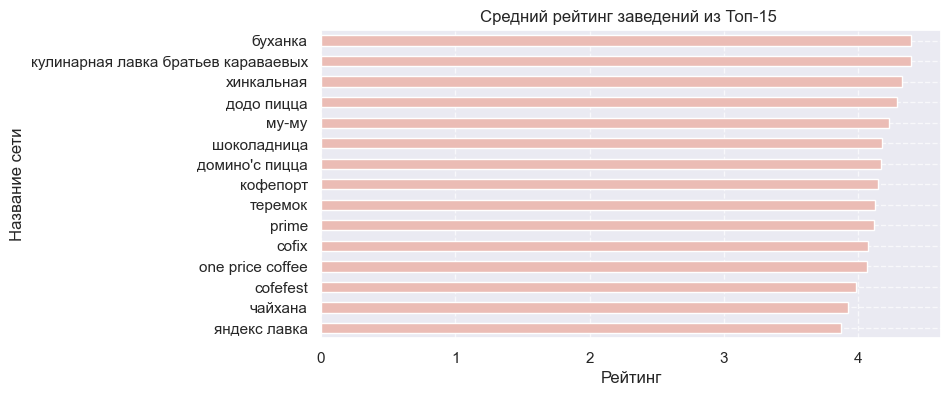

In [72]:
grouped_by_name_sorted = grouped_by_name_top.sort_values(by='mean_rating', ascending=True)
grouped_by_name_sorted.plot(kind='barh',
                          x='name',
                          rot=0,
                          legend=False,
                          figsize=(8, 4),
                          color='#EBBCB5')

# Настраиваем оформление графика
plt.title(f'Средний рейтинг заведений из Топ-15 ')
plt.xlabel('Рейтинг') 
plt.ylabel('Название сети')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

Топ три сетей по рейтингу: 
- 'Буханка' (4.3);
- "Кулинарная лавка братьев караваевых" (4.3);
- 'Хинкальная' (4.3).

Наименьший ретинг у 'Яндекс лавки' (3.8).     


---

Изучим средний рейтиг сетевых и не сетевых заведений по категориям.

In [73]:
grouped_by_cat_ch = df.groupby(['category','chain'])['rating'].mean().unstack(fill_value=0).sort_values(by=0, ascending=False)
grouped_by_cat_ch = grouped_by_cat_ch.reset_index()
grouped_by_cat_ch

chain,category,0,1
0,"бар,паб",4.386913,4.390533
1,кофейня,4.350505,4.206806
2,ресторан,4.325209,4.227671
3,пиццерия,4.321122,4.283030
4,булочная,4.240404,4.285987
5,столовая,4.201322,4.237500
6,кафе,4.087492,4.198588
7,быстрое питание,4.046361,4.056466


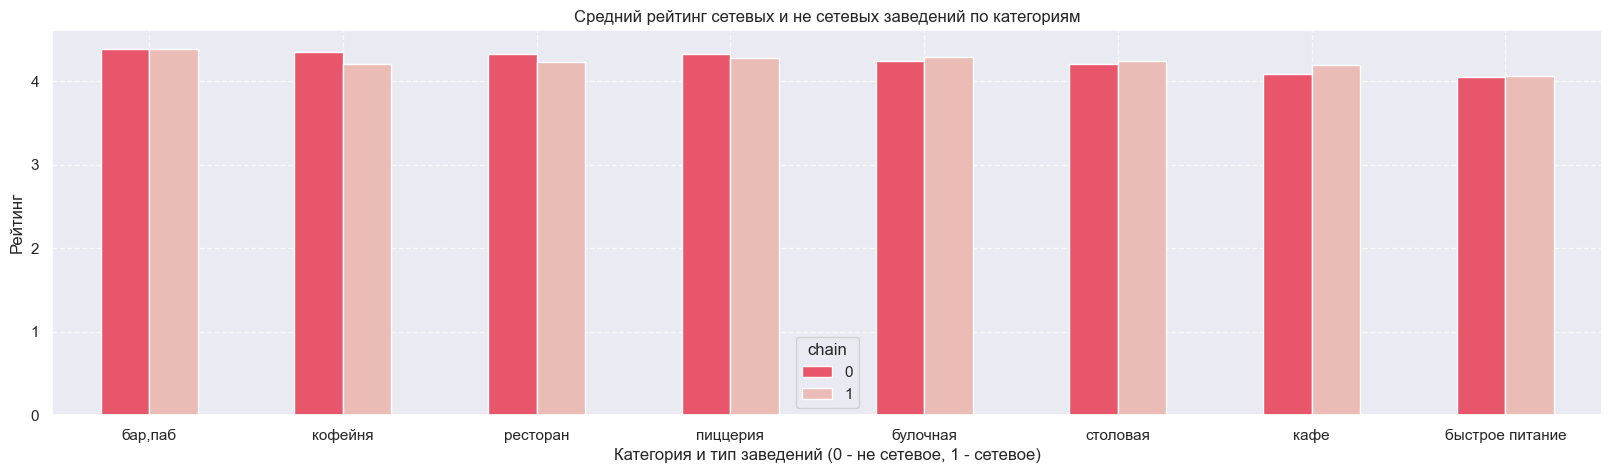

In [74]:
colors = ['#E8566B', '#EBBCB5']

# Построим график столбчатой диаграммы
grouped_by_cat_ch.plot(kind='bar',
                       x='category',
                       rot=0,
                       legend=True,
                       figsize=(20, 5),
                       color=colors
)

# Включаем сетку только по оси Y
plt.title(f'Средний рейтинг сетевых и не сетевых заведений по категориям')
plt.xlabel('Категория и тип заведений (0 - не сетевое, 1 - сетевое)')
plt.ylabel('Рейтинг')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

#### Промежуточный вывод

**Топ-5 сетей в Москве по количеству заведений**

1. "Шоколадница" - 120 заведений.
2. "Домино'с пицца" - 76 заведений.
3. "Додо пицца" - 74 заведения.
4. "One price coffee" - 71 заведение.
5. "Яндекс лавка" - 69 заведений.

Наименьшее количество заведений сети 'му-му' - 27.

**Топ-5 сетей в Москве по рейтингу**
Топ три сетей по рейтингу: 
1. 'Буханка' (4.3);
2. "Кулинарная лавка братьев караваевых" (4.3);
3. 'Хинкальная' (4.3);
4. 'Додо пицца'	(4.2);
5. 'му-му' (4.2).

Наименьший ретинг у 'Яндекс лавки' (3.8).

**Исходя из полученной информации можно предположить, что количество заведений слабо коррелируется с рейтингом заведений.** 

**Рейтинг заведений**

Топ-3 категорий сетевых заведений с наибольшим рейтином:
- бар,паб (4.39);
- булочная (4.29);
- пиццерия (4.28); 

Категори не сетевых заведений с наибольшим рейтином:
- бар,паб (4.38);
- кофейня (4.35);
- ресторан (4.32); 

Наименьший рейтинг для обоих типов заведений является категория "быстрое питание":	
- рейтин 4.05 для несетеовых заведний;
- рейтинг 4.06 для сетевых заведений.

### Средний чек

1. Изучим вариацию размера среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. 
2. Определим как удалённость от центра влияет на цены в заведениях. 

In [75]:
# Построим график столбчатой диаграммы
grouped_by_district = df.groupby('district')['middle_avg_bill'].mean()
grouped_by_district = grouped_by_district.reset_index()
round(grouped_by_district.sort_values(by='middle_avg_bill', ascending=False))

,district,middle_avg_bill
5,Центральный административный округ,1191.0
1,Западный административный округ,1053.0
2,Северный административный округ,928.0
8,Южный административный округ,834.0
4,Северо-Западный административный округ,822.0
0,Восточный административный округ,821.0
7,Юго-Западный административный округ,793.0
3,Северо-Восточный административный округ,717.0
6,Юго-Восточный административный округ,654.0


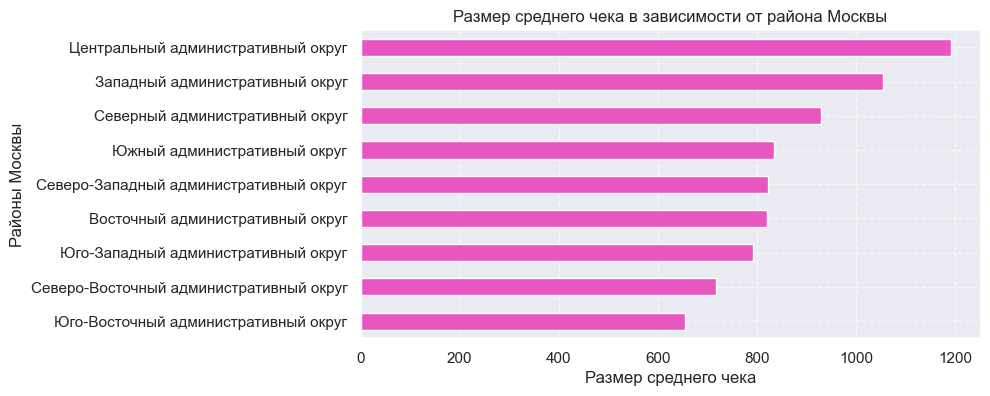

In [76]:
district_sorted = grouped_by_district.sort_values(by='middle_avg_bill', ascending=True)

# Построим график столбчатой диаграммы
district_sorted.plot(kind='barh',
                         x='district',
                         legend=False,
                         figsize=(8, 4),
                         color='#E856C2'
)

# Включаем сетку только по оси Y
plt.title(f'Размер среднего чека в зависимости от района Москвы')
plt.xlabel('Размер среднего чека')
plt.ylabel('Районы Москвы')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

#### Промежуточный вывод

Наибольший средний чек в Центральный административный округе - 1191 руб., наименьший в Юго-Восточный административный округ - 654 руб. (почти в 2 раза меньше чем в Центральном).

На 2-ом и 3-ем местах по размеру среднего чека находятся:
- Западный административный округ - 1053 руб.
- Северный административный округ - 927 руб.

При удалении от центра происходит уменьшение размера среднего чека (`middle_avg_bill`). В некоторых случаях снижение цены незначительное ~ 15% (Западный административный округ), в некоторых происходит снижение почти в 2 раза (Северо-Восточный административный округ, Юго-Восточный административный округ).

Наибольшее снижение среднего чека наблюдается в восточной части Москвы:
- Восточный - 820 руб.;
- Северо-Восточный 716.;
- Юго-Восточный 654 руб.

---

### Дополнительный анализ данных

Проведем исследования других данных и их взаимосвязи:
- часы работы заведений;
- стоимость чашки кофе;

Их зависимости от расположения и типа заведения.


---

Изучим количество круглосуточных и некруглосуточных заведений в зависимости от округа.

In [77]:
pivot_district = df.pivot_table(values='id', index='district', columns='is_24_7', aggfunc='count').sort_values(by=False, ascending=False)
pivot_district

is_24_7,False,True
district,,
Центральный административный округ,2111,131
Северный административный округ,829,71
Южный административный округ,817,75
Северо-Восточный административный округ,816,75
Западный административный округ,779,72
Восточный административный округ,701,97
Юго-Западный административный округ,636,73
Юго-Восточный административный округ,621,93
Северо-Западный административный округ,366,43


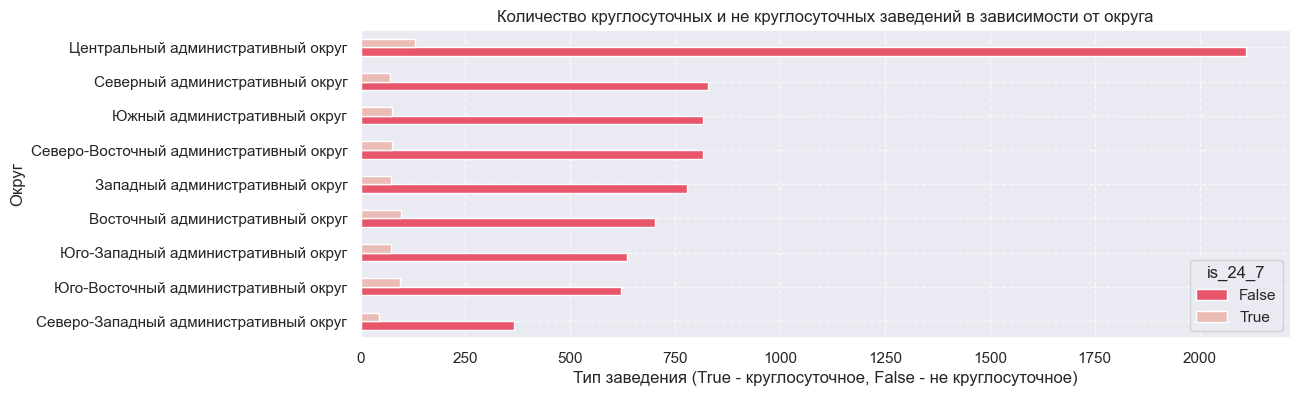

In [78]:
pivot_district_sorted = pivot_district.sort_values(by=False, ascending=True)

colors = ['#E8566B', '#EBBCB5']

# Построим график столбчатой диаграммы
pivot_district_sorted.plot(kind='barh',
                           rot=0,
                           legend=True,
                           figsize=(12, 4),
                           color=colors
)

# Включаем сетку только по оси Y
plt.title(f'Количество круглосуточных и не круглосуточных заведений в зависимости от округа')
plt.xlabel('Тип заведения (True - круглосуточное, False - не круглосуточное)')
plt.ylabel('Округ')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

Округ практически не влияет на количество круглосуточных заведений. Как правило количество круглосуточных заведений пропорционально количеству не круглосуточных заведений в этом округе и их существенно меньше чем некруглосуточных.
    
---


Далее изучим стоимость чашки кофе в зависимости от округа.

In [79]:
# Ограничим выборку. Будем учитывать только те значения, которые больше 0.
df_sorted = df.loc[(df['middle_coffee_cup'] > 0)]

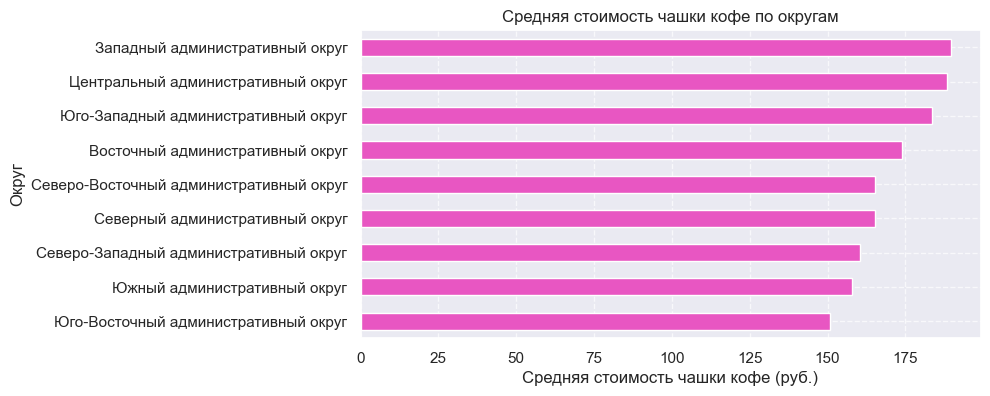

In [80]:
# Сгруппируем данные по округу и построим диаграмму
grouped_by_district = df_sorted.groupby('district')['middle_coffee_cup'].mean().sort_values(ascending=True)

# Построим график столбчатой диаграммы
grouped_by_district.plot(kind='barh',
                         legend=False,
                         figsize=(8, 4),
                         color='#E856C2'
)

# Включаем сетку только по оси Y
plt.title(f'Средняя стоимость чашки кофе по округам')
plt.xlabel('Средняя стоимость чашки кофе (руб.)')
plt.ylabel('Округ')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [81]:
grouped_by_district = grouped_by_district.reset_index()
round(grouped_by_district.sort_values(by='middle_coffee_cup', ascending=False))

,district,middle_coffee_cup
8,Западный административный округ,190.0
7,Центральный административный округ,188.0
6,Юго-Западный административный округ,183.0
5,Восточный административный округ,174.0
4,Северо-Восточный административный округ,165.0
3,Северный административный округ,165.0
2,Северо-Западный административный округ,160.0
1,Южный административный округ,158.0
0,Юго-Восточный административный округ,151.0


Cущественной разницы в стоимости кофе не наблюдается по округам.

---


Проверим влияние категории заведения на стоимость кофе.

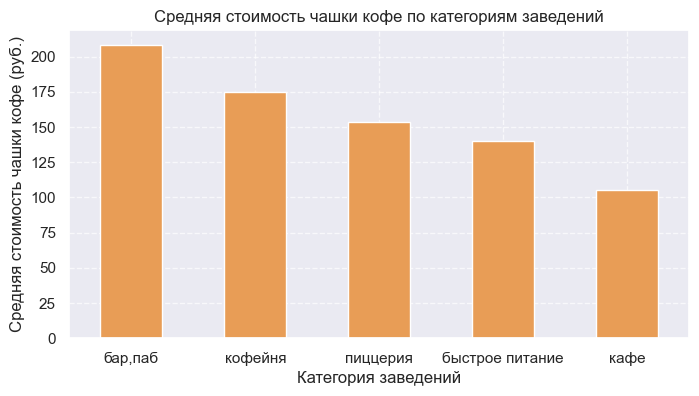

In [82]:
# Сгруппируем данные по категориям заведений
grouped_by_categories = df_sorted.groupby('category')['middle_coffee_cup'].mean().sort_values(ascending=False)

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
grouped_by_categories.plot(kind='bar', 
             rot=0, 
             figsize=(8, 4),
             color='#E89D56'                              
)


# Настраиваем оформление графика
plt.title(f'Средняя стоимость чашки кофе по категориям заведений')
plt.xlabel('Категория заведений')
plt.ylabel('Средняя стоимость чашки кофе (руб.)')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [83]:
grouped_by_categories = grouped_by_categories.reset_index()
round(grouped_by_categories) 

,category,middle_coffee_cup
0,"бар,паб",208.0
1,кофейня,175.0
2,пиццерия,153.0
3,быстрое питание,140.0
4,кафе,106.0


В случае с категорией заведения различия существенны. Стоимость кофе в категории "бар,паб" почти в два раза больше чем в "кафе".

---


Изучим как влияет категория заведения и округ на размер среднего чека.

In [84]:
# Ограничим выборку по среденму чеку
df_slice_by_bill = df.loc[(df['middle_avg_bill'] > 0)]

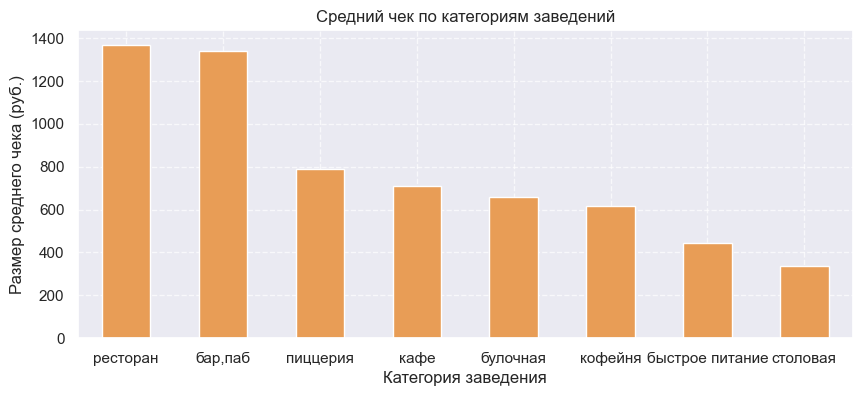

In [85]:
# Сгруппируем данные по категориям заведений
avg_bill_per_category = df_slice_by_bill .groupby('category')['middle_avg_bill'].mean().sort_values(ascending=False)

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
avg_bill_per_category.plot(kind='bar', 
             rot=0, 
             figsize=(10, 4),
             color='#E89D56'                              
)

# Настраиваем оформление графика
plt.title(f'Средний чек по категориям заведений')
plt.ylabel('Размер среднего чека (руб.)')
plt.xlabel('Категория заведения')

# Настроим сетку
plt.grid(True, linestyle='--', alpha=0.7)

# Выводим график
plt.show()

In [86]:
avg_bill_per_category = avg_bill_per_category.reset_index()
round(avg_bill_per_category) 

,category,middle_avg_bill
0,ресторан,1368.0
1,"бар,паб",1339.0
2,пиццерия,789.0
3,кафе,708.0
4,булочная,659.0
5,кофейня,617.0
6,быстрое питание,446.0
7,столовая,335.0


Категория заведений существенно влияет на размер среднего чека. Размер среднего чека в ресторанах почти в 4 раза больше чем в столовых. 

Расположение заведений по округам существенно влияет на размер среднего чека. Самый большой средний чек в округе Центральный - 1192 рубля, самый маленький в Юго-Восточном - 654 рубля. Разница в среднем чеке почти в 2 раза.

---


### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

После изучения полученных результатов можно сказать следующее: 
- Существенной корреляции в данных не наблюдается.
- Наиболее сильно на количество заведений, категорию и средний чек влияет расположение заведения (округ).
- График работы в том числе круглосуточная работа существенного влияния на средний чек и рейтинг заведения не оказывает.
- Центральный округ имеет наимбольшее количество заведений общественного питания и наибольший средний чек.
- Ресторан является наиболее популярной категорией заведения с высоким рейтингом и средним чеком.

## Итоговый вывод и рекомендации

### Ключевые выводы по исследованию

#### Категории заведений

В исследуемом наборе данных представлены следующие типы заведений:

* ресторан
* кофейня
* кафе
* бар/паб
* пиццерия
* быстрое питание
* столовая
* булочная

Наиболее распространённой категорией являются **кафе** — 2378 объектов, что составляет около **28%** от общего числа заведений в Москве. Наименее распространённой категорией оказались **булочные** — 256 заведений (около **3%**).

#### География: административные округа Москвы

В данных представлены заведения из всех основных административных округов Москвы. Лидером по количеству объектов является **Центральный административный округ** — здесь расположено **2242 заведения**. Для сравнения, **Северо-Западный округ** насчитывает всего **409 объектов**, что почти в **5 раз меньше**, чем в центральной части города.

Особенностью Центрального округа является **смещение предпочтений в сторону ресторанов**, которые здесь представлены в наибольшем количестве (670 заведений), в отличие от общей структуры по городу.

#### Формат заведения: сетевые и не сетевые

Большинство заведений в выборке — **не сетевые** (5201 объект), что составляет **более 60%** от общего числа.

В обеих группах — как среди сетевых, так и среди не сетевых — **наиболее популярной категорией остаются кафе** (1599 и 779 соответственно).
Наименее представленные категории различаются:

* для **сетевых заведений** — это **столовые** (88 объектов),
* для **не сетевых** — **булочные** (99 объектов).

#### Обработка выбросов

В данных зафиксированы значительные выбросы, вероятнее всего, вызванные:

* ошибками ввода (например, лишние нули),
* или существованием уникальных объектов с нестандартной вместимостью.

После удаления выбросов средние значения по количеству посадочных мест по категориям варьируются **в диапазоне от 59 до 79 мест**, без существенных различий между типами заведений.

#### Рейтинги и факторы их влияния

Средние оценки различных типов заведений варьируются **от 4.05 до 4.39**.
**Наивысший рейтинг** зафиксирован у заведений категории **бар/паб** — **4.39**.

Корреляционный анализ показал **отсутствие существенной взаимосвязи** между рейтингом и другими переменными. Максимальная корреляция наблюдается между рейтингом и:

* типом заведения (0.10),
* средним чеком (0.04).

Обе величины указывают на **слабую связь**, что не позволяет говорить о прямой зависимости.

Среди **сетевых заведений**, наибольший рейтинг отмечается у следующих категорий:

* бар/паб — 4.38
* пиццерия — 4.30
* ресторан — 4.29
* кофейня — 4.27

#### Средний чек и география

**Удалённость от центра** Москвы оказывает влияние на **размер среднего чека**:

* В **Западном округе** снижение незначительное (около 15% по сравнению с Центральным),
* в **Северо-Восточном** и **Юго-Восточном округах** — средний чек падает почти в **2 раза**.

Это может быть связано с разницей в уровне арендных ставок, доходов населения и спроса.

#### Круглосуточные заведения

**Доля круглосуточных заведений пропорциональна общему количеству заведений в округе**, что говорит о **сбалансированности распределения**.

#### Стоимость чашки кофе

Анализ стоимости чашки кофе позволяет сделать только ориентировочные выводы, поскольку в столбце `middle_coffee_cup` отсутствует **около 86% значений**.

Тем не менее, наиболее дорогая чашка кофе фиксируется:

* в **Западном округе** — 190 руб.
* в **Центральном** — 188 руб.
* в **Юго-Западном** — 183 руб.

По категориям заведений:

* бар/паб — 208 руб.
* кофейня — 175 руб.
* пиццерия — 153 руб.
* быстрое питание — 140 руб.
* кафе — 106 руб.

#### Влияние категории и округа на средний чек

Наибольший средний чек наблюдается у:

* **ресторанов** — 1367 руб.
* **баров/пабов** — 1338 руб.
* **пиццерий** — 789 руб.

Среди округов лидируют:

* **Центральный** — 1192 руб.
* **Западный** — 1053 руб.
* **Северный** — 927 руб.
  Минимальные значения — в **Юго-Восточном округе** (654 руб.).

---


### Рекомендации на основе анализа

На основании проведённого анализа можно дать следующие рекомендации по выбору категории заведения и его расположения:

#### Категория заведения

Выбор категории оказывает влияние на **средний чек**, **рейтинг** и **возможности масштабирования** (сетевой формат).

**Рекомендуемые категории с высоким рейтингом и экономическим потенциалом:**

* **Бар/паб**

  * Высокий средний рейтинг (4.38)
  * Один из самых высоких чеков (1338 руб.)
  * Самая дорогая чашка кофе
  * Умеренное распространение: потенциально ниже конкуренция
  * Чаще представлены как не сетевые, но сетевые — демонстрируют наивысшее качество

* **Пиццерия**

  * Второй по величине рейтинг (4.30)
  * Средний чек — 789 руб.
  * Умеренное количество заведений, что делает вход на рынок менее конкурентным
  * Возможность открытия по франшизе или самостоятельно

* **Ресторан**

  * Лидер по среднему чеку (1367 руб.)
  * Третий по рейтингу (4.29)
  * Высокий уровень конкуренции, особенно в центре Москвы
  * Наиболее представленный формат в Центральном округе

**Вывод:**
Открытие **бара/паба** или **пиццерии** может быть экономически целесообразнее, чем ресторана, ввиду **меньшей насыщенности рынка** и **небольшой разницы в среднем чеке**.

#### Географическое расположение

При выборе локации стоит рассматривать **Западный** и **Северный административные округа**. Несмотря на то что они уступают Центральному округу по среднему чеку (разница 10–20%), количество заведений в этих округах **в 2 раза меньше**, что означает **меньшую конкуренцию**. Кроме того, **арендные ставки и стоимость недвижимости, вероятно, будут ниже**.

#### Дополнительные шаги

* Провести **дополнительный анализ по потребительскому спросу**, включая данные о трафике, населении и доходах по районам.
* Изучить **успешные кейсы сетевых заведений** в выбранной категории.
* Оценить экономическую эффективность открытия заведений по **модели франчайзинга**.

#### Важно:

Анализ проводился на основании имеющихся данных. В некоторых столбцах наблюдается **значительный уровень пропущенных значений**, что накладывает ограничения на глубину выводов. Рекомендуется дополнить исследование внешними источниками и маркетинговыми опросами.